#**LE ANH HOANG - DA73 - FINAL TEST - GEELY AUTO**

# **Đề bài 1: Dự đoán Giá ô tô tại thị trường Mỹ**

## **1. Problem Statement**
Một công ty ô tô Trung Quốc **Geely Auto** muốn thâm nhập **thị trường Mỹ** bằng cách thành lập đơn vị sản xuất và sản xuất ô tô để cạnh tranh với các đối thủ **Mỹ và châu Âu**.  

Vì vậy, họ đã ký hợp đồng với một **công ty tư vấn ô tô** để nghiên cứu **các yếu tố ảnh hưởng đến giá ô tô** tại Mỹ. Những yếu tố này có thể rất khác so với thị trường Trung Quốc.  

Cụ thể, họ muốn biết:  
➔ **Những yếu tố nào quan trọng trong việc định giá ô tô?**  
➔ **Các thông số nào của ô tô ảnh hưởng đến giá của chiếc xe đó?**  

---

## **2. Business Goal**
Bạn được yêu cầu **xây dựng một mô hình dự đoán giá ô tô** dựa trên các **features** trong tập dữ liệu.  

Mô hình này sẽ giúp **team Product**:  
- **Hiểu cách giá xe thay đổi** theo từng đặc điểm  
- **Đưa ra quyết định thiết kế ô tô** để phù hợp với từng phân khúc giá  
- **Xây dựng chiến lược kinh doanh** phù hợp với thị trường Mỹ  

Ngoài ra, **Ban điều hành (BOD)** có thể sử dụng mô hình này để hiểu sâu hơn về **cách định giá trong thị trường mới** và tối ưu hóa chiến lược kinh doanh.

---

## **3. Yêu cầu**
- Khám phá dữ liệu, xác định các yếu tố quan trọng ảnh hưởng đến giá ô tô  
- Xây dựng mô hình Machine Learning để dự đoán giá  
- Đánh giá hiệu suất mô hình và đề xuất giải pháp  

**Chúc bạn coding vui vẻ! 🚗🚀**

## **Get your data ready**

In [145]:
#import thư viện -> Get Data Ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from datetime import datetime

#import thư viện -> Modelling
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from scipy.stats import chi2_contingency
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

#random seed setup
import numpy as np
np.random.seed(42)

#import biểu đồ
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#import metrics đánh giá
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

### Table

In [146]:
df = pd.read_csv("/content/drive/MyDrive/Khóa 3 - DS - MINDX/Final Test/car_price_dataset.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [147]:
df.shape

(205, 26)

In [148]:
df.duplicated().sum()

0

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## **EDA**

### **Data Dictionary: Dữ liệu ô tô**
## **1. Thông tin chung**
| **Tên cột**      | **Mô tả** | **Loại dữ liệu** |
|------------------|----------|------------------|
| `Car_ID`        | ID duy nhất của mỗi xe | Integer |
| `Symboling`     | Xếp hạng rủi ro bảo hiểm (-3: an toàn, +3: rủi ro) | Categorical |
| `carCompany`    | Tên hãng xe | Categorical |

---

## **2. Thông tin kỹ thuật**
| **Tên cột**      | **Mô tả** | **Loại dữ liệu** |
|------------------|----------|------------------|
| `fueltype`      | Loại nhiên liệu (`gas` hoặc `diesel`) | Categorical |
| `aspiration`    | Hệ thống tăng áp của xe | Categorical |
| `doornumber`    | Số lượng cửa | Categorical |
| `carbody`       | Kiểu dáng xe | Categorical |
| `drivewheel`    | Loại bánh lái (`FWD`, `RWD`, `4WD`) | Categorical |
| `enginelocation` | Vị trí động cơ (`front`, `rear`) | Categorical |
| `wheelbase`     | Chiều dài cơ sở của xe | Numeric |
| `carlength`     | Chiều dài tổng thể của xe | Numeric |
| `carwidth`      | Chiều rộng xe | Numeric |
| `carheight`     | Chiều cao xe | Numeric |
| `curbweight`    | Trọng lượng xe khi không có hành khách hoặc hàng hóa | Numeric |

---

## **3. Động cơ & Hệ thống vận hành**
| **Tên cột**      | **Mô tả** | **Loại dữ liệu** |
|------------------|----------|------------------|
| `enginetype`    | Loại động cơ (`ohc`, `ohcf`, `dohc`...) | Categorical |
| `cylindernumber` | Số lượng xi-lanh | Categorical |
| `enginesize`    | Dung tích động cơ (cc) | Numeric |
| `fuelsystem`    | Hệ thống nhiên liệu (`mpfi`, `spdi`, `2bbl`...) | Categorical |
| `boreratio`     | Tỉ số bore | Numeric |
| `stroke`        | Hành trình piston | Numeric |
| `compressionratio` | Tỉ số nén | Numeric |
| `horsepower`    | Mã lực của xe | Numeric |
| `peakrpm`      | Vòng tua cực đại | Numeric |

---

## **4. Hiệu suất nhiên liệu**
| **Tên cột**      | **Mô tả** | **Loại dữ liệu** |
|------------------|----------|------------------|
| `citympg`       | Mức tiêu thụ nhiên liệu trong thành phố (mpg) | Numeric |
| `highwaympg`    | Mức tiêu thụ nhiên liệu trên đường cao tốc (mpg) | Numeric |

---

## **5. Biến mục tiêu (Dependent Variable)**
| **Tên cột**      | **Mô tả** | **Loại dữ liệu** |
|------------------|----------|------------------|
| `price`         | Giá của xe (Mục tiêu dự đoán) | Numeric |

### Phân tích tổng quan

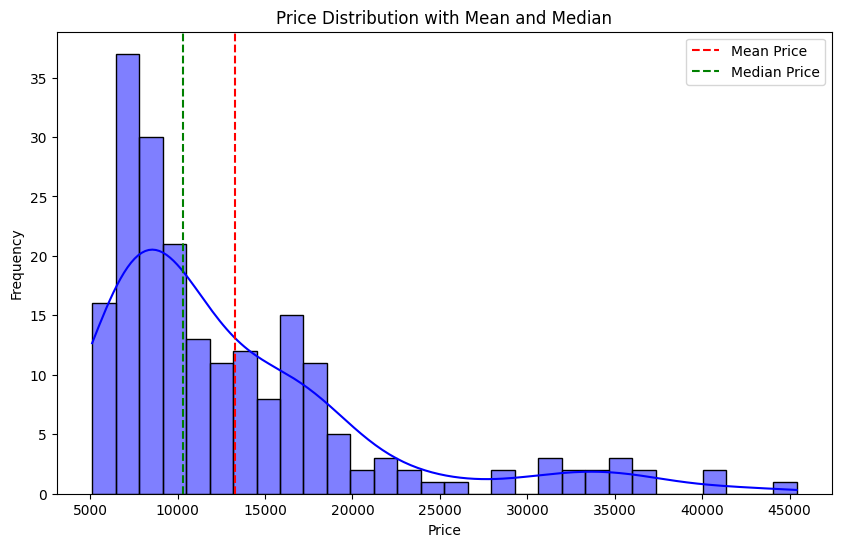

In [150]:
# Analyze price distribution to identify luxury vs. budget segments
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True, color='blue')
plt.axvline(df['price'].mean(), color='red', linestyle='--', label='Mean Price')
plt.axvline(df['price'].median(), color='green', linestyle='--', label='Median Price')
plt.title('Price Distribution with Mean and Median')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()


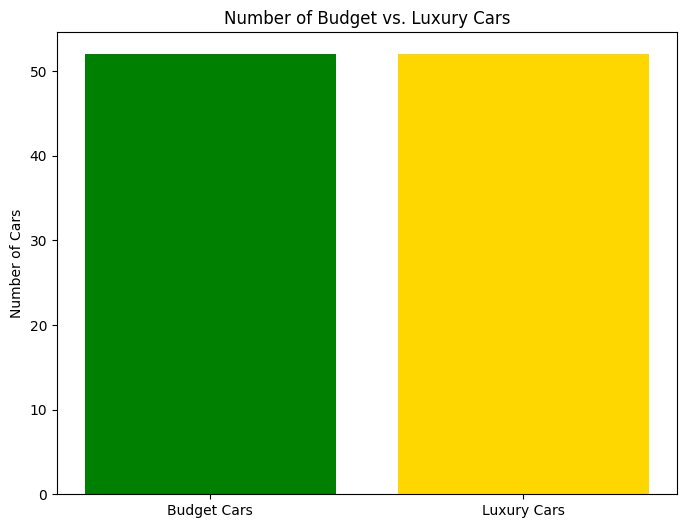

In [152]:
# Define thresholds for budget and luxury cars
luxury_threshold = df['price'].quantile(0.75)  # Top 25% as luxury
budget_threshold = df['price'].quantile(0.25)  # Bottom 25% as budget

# Count cars in each segment
luxury_cars = df[df['price'] >= luxury_threshold]
budget_cars = df[df['price'] <= budget_threshold]

# Plot luxury vs. budget car counts
plt.figure(figsize=(8, 6))
counts = [len(budget_cars), len(luxury_cars)]
labels = ['Budget Cars', 'Luxury Cars']
colors = ['green', 'gold']
plt.bar(labels, counts, color=colors)
plt.title('Number of Budget vs. Luxury Cars')
plt.ylabel('Number of Cars')
plt.show()

Feature Comparison between Segments:
                 Budget       Luxury
enginesize    95.057692   172.596154
horsepower    69.346154   147.115385
curbweight  2009.961538  3176.134615


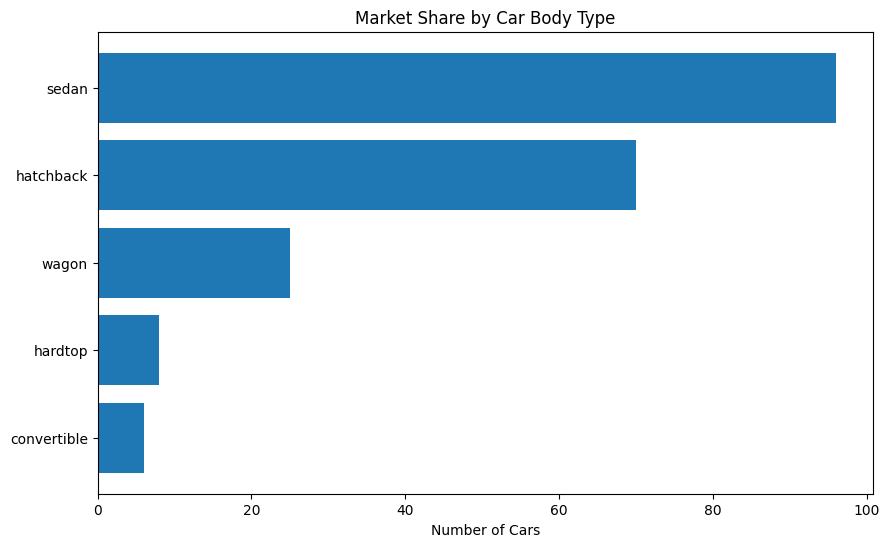

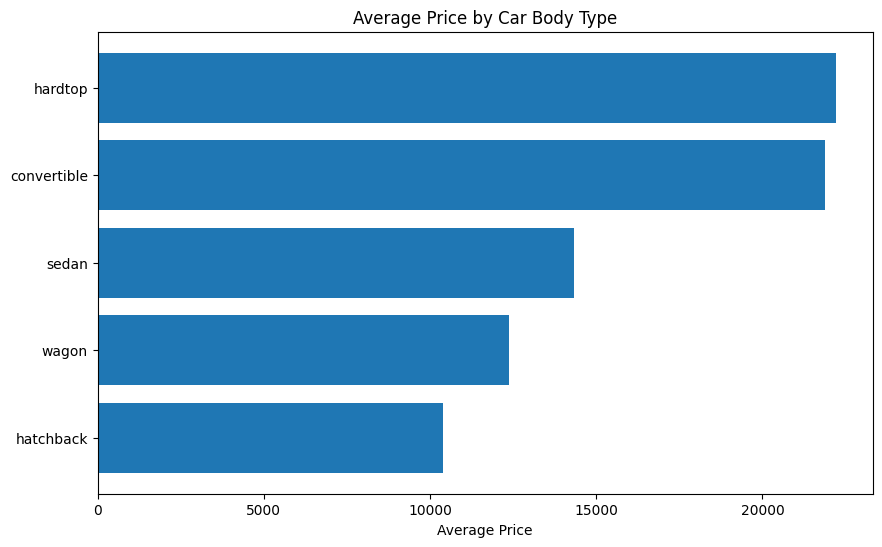

In [153]:
# Analyze key features for each segment
features = ['enginesize', 'horsepower', 'curbweight']

# Compare average features between segments
segment_comparison = pd.DataFrame({
    'Budget': [budget_cars[feature].mean() for feature in features],
    'Luxury': [luxury_cars[feature].mean() for feature in features]
}, index=features)

print("\
Feature Comparison between Segments:")
print(segment_comparison)

# Market share analysis
plt.figure(figsize=(10, 6))
market_share = df.groupby('carbody')['price'].count().sort_values(ascending=True)
plt.barh(market_share.index, market_share.values)
plt.title('Market Share by Car Body Type')
plt.xlabel('Number of Cars')
plt.show()

# Average price by car body type
plt.figure(figsize=(10, 6))
avg_price_body = df.groupby('carbody')['price'].mean().sort_values(ascending=True)
plt.barh(avg_price_body.index, avg_price_body.values)
plt.title('Average Price by Car Body Type')
plt.xlabel('Average Price')
plt.show()

### Các yếu tố ảnh hưởng đến giá thành của xe

#### Yếu tố định lượng

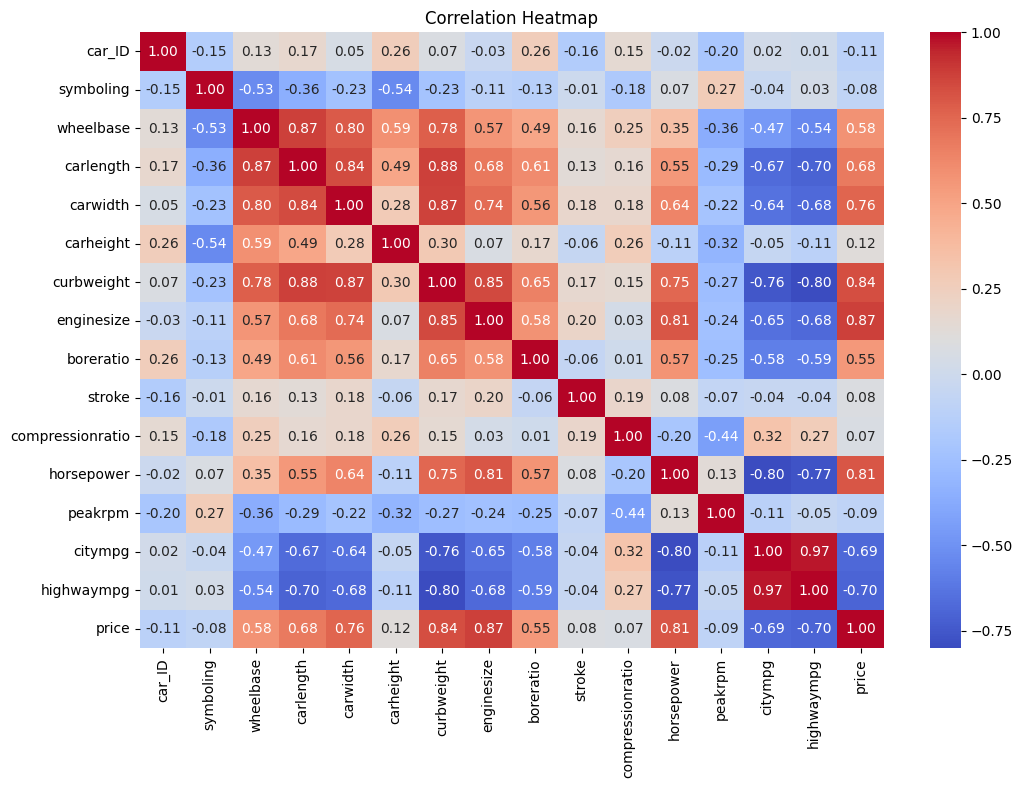

Correlation heatmap successfully plotted with numeric columns.


In [72]:
# Selecting only numeric columns for the correlation matrix
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Re-plotting the correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = numeric_columns.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

print("Correlation heatmap successfully plotted with numeric columns.")

Những yếu tố định lượng ảnh hưởng đến giá xe: whell base, carlength, curbweight, enginesize, boreratio, horsepower, citympg, highwaympg

#### Yếu tố định tính

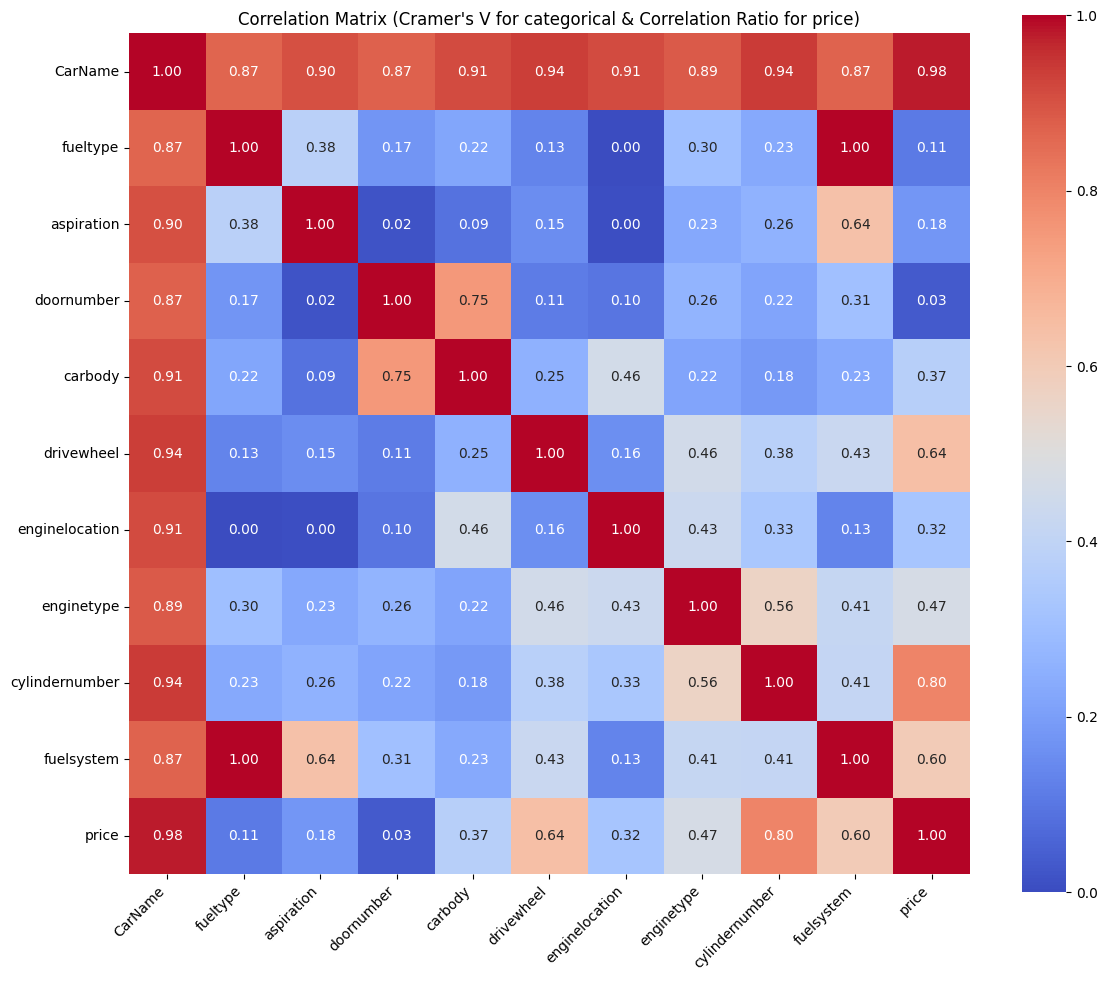

In [73]:
def correlation_ratio(categories, values):
    """
    Calculate the correlation ratio (η) between a categorical variable and a continuous variable
    """
    categories = pd.Categorical(categories)

    # Calculate means per category
    cat_means = np.array([values[categories == category].mean()
                         for category in categories.categories])

    # Calculate total mean
    total_mean = values.mean()

    # Calculate weighted sum of squared deviations from category means
    numerator = sum(len(values[categories == category]) *
                   (mean - total_mean) ** 2
                   for category, mean in zip(categories.categories, cat_means))

    # Calculate total sum of squared deviations
    denominator = sum((values - total_mean) ** 2)

    if denominator == 0:
        correlation_ratio = 0
    else:
        correlation_ratio = (numerator / denominator) ** 0.5

    return correlation_ratio

def create_combined_correlation_matrix(df, categorical_cols):
    n = len(categorical_cols) + 1  # +1 for price
    matrix = np.zeros((n, n))

    # Calculate correlations between categorical variables
    for i in range(len(categorical_cols)):
        for j in range(len(categorical_cols)):
            if i == j:
                matrix[i][j] = 1.0
            else:
                cat1 = pd.Categorical(df[categorical_cols[i]])
                cat2 = pd.Categorical(df[categorical_cols[j]])
                cont_table = pd.crosstab(cat1, cat2)
                chi2, _, _, _ = chi2_contingency(cont_table)
                n_observations = cont_table.sum().sum()
                min_dim = min(cont_table.shape) - 1
                if min_dim == 0:
                    matrix[i][j] = 0
                else:
                    cramer_v = np.sqrt(chi2 / (n_observations * min_dim))
                    matrix[i][j] = cramer_v

    # Calculate correlation ratios with price
    for i in range(len(categorical_cols)):
        correlation = correlation_ratio(df[categorical_cols[i]], df['price'])
        matrix[i, -1] = correlation
        matrix[-1, i] = correlation

    # Price self-correlation
    matrix[-1, -1] = 1.0

    return matrix

# Get categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Calculate correlation matrix
corr_matrix = create_combined_correlation_matrix(df, categorical_cols)

# Create labels including 'price'
labels = categorical_cols + ['price']

# Create a DataFrame for better visualization
corr_df = pd.DataFrame(corr_matrix,
                      index=labels,
                      columns=labels)

# Plot correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_df,
            annot=True,
            cmap='coolwarm',
            fmt='.2f',
            square=True)
plt.title('Correlation Matrix (Cramer\'s V for categorical & Correlation Ratio for price)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

- Các yếu tố định tính ảnh hưởng đến giá xe: **fuelsystem, cylindernumber, drivewheel, CarName, enginetype**

### Phân tích các yếu tố có ảnh hưởng lớn đến giá xe

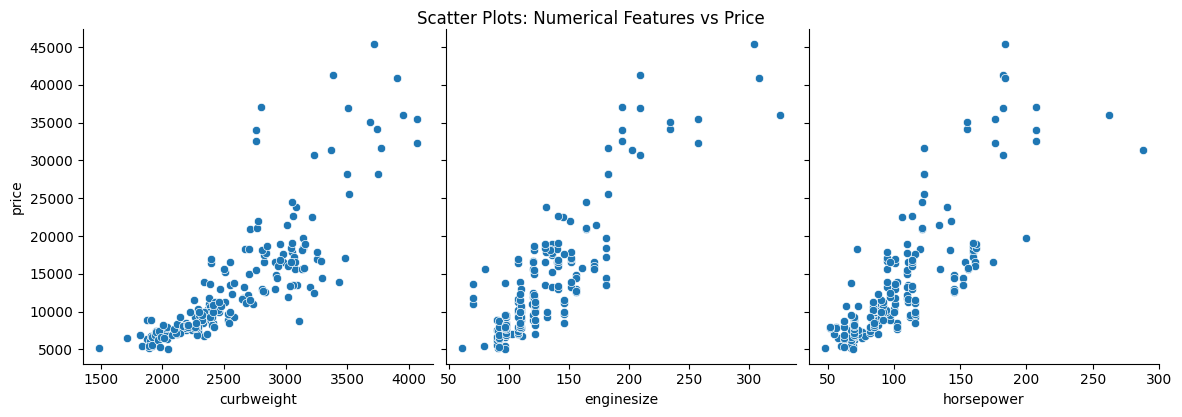

<ipython-input-74-5ee74286e35f>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')
<ipython-input-74-5ee74286e35f>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')


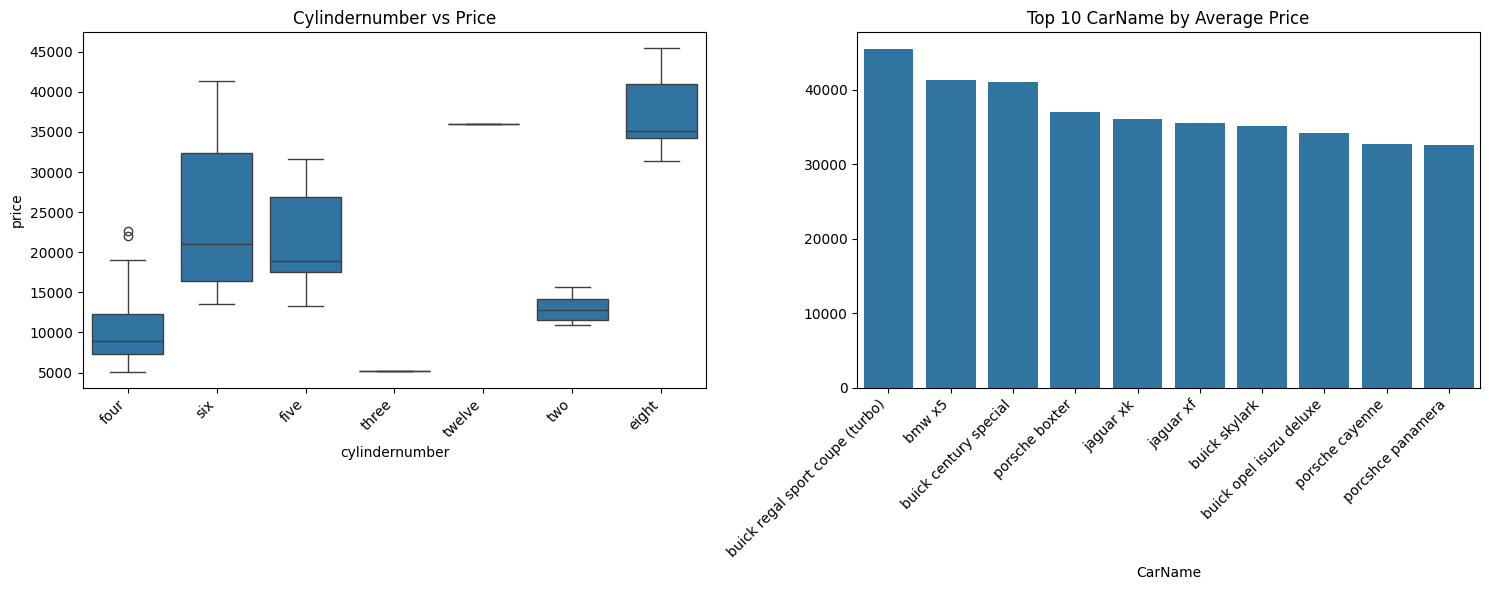

Summary Statistics for Numerical Columns:
        curbweight  enginesize  horsepower         price
count   205.000000  205.000000  205.000000    205.000000
mean   2555.565854  126.907317  104.117073  13276.710571
std     520.680204   41.642693   39.544167   7988.852332
min    1488.000000   61.000000   48.000000   5118.000000
25%    2145.000000   97.000000   70.000000   7788.000000
50%    2414.000000  120.000000   95.000000  10295.000000
75%    2935.000000  141.000000  116.000000  16503.000000
max    4066.000000  326.000000  288.000000  45400.000000


In [74]:
# Perform EDA on high-impact columns
high_impact_columns = ['curbweight', 'enginesize', 'horsepower', 'cylindernumber', 'CarName']

# Pairplot for numerical columns vs price
sns.pairplot(df,
             x_vars=['curbweight', 'enginesize', 'horsepower'],
             y_vars=['price'],
             kind='scatter',
             height=4, aspect=1)
plt.suptitle('Scatter Plots: Numerical Features vs Price', y=1.02)
plt.show()

# Boxplot for categorical columns vs price
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
sns.boxplot(x='cylindernumber', y='price', data=df, ax=axes[0])
axes[0].set_title('Cylindernumber vs Price')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')

# Top 10 CarName by average price
carname_avg_price = df.groupby('CarName')['price'].mean().sort_values(ascending=False).head(10)
sns.barplot(x=carname_avg_price.index, y=carname_avg_price.values, ax=axes[1])
axes[1].set_title('Top 10 CarName by Average Price')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Summary statistics for numerical columns
summary_stats = df[['curbweight', 'enginesize', 'horsepower', 'price']].describe()
print("Summary Statistics for Numerical Columns:")
print(summary_stats)

###Logic Tree

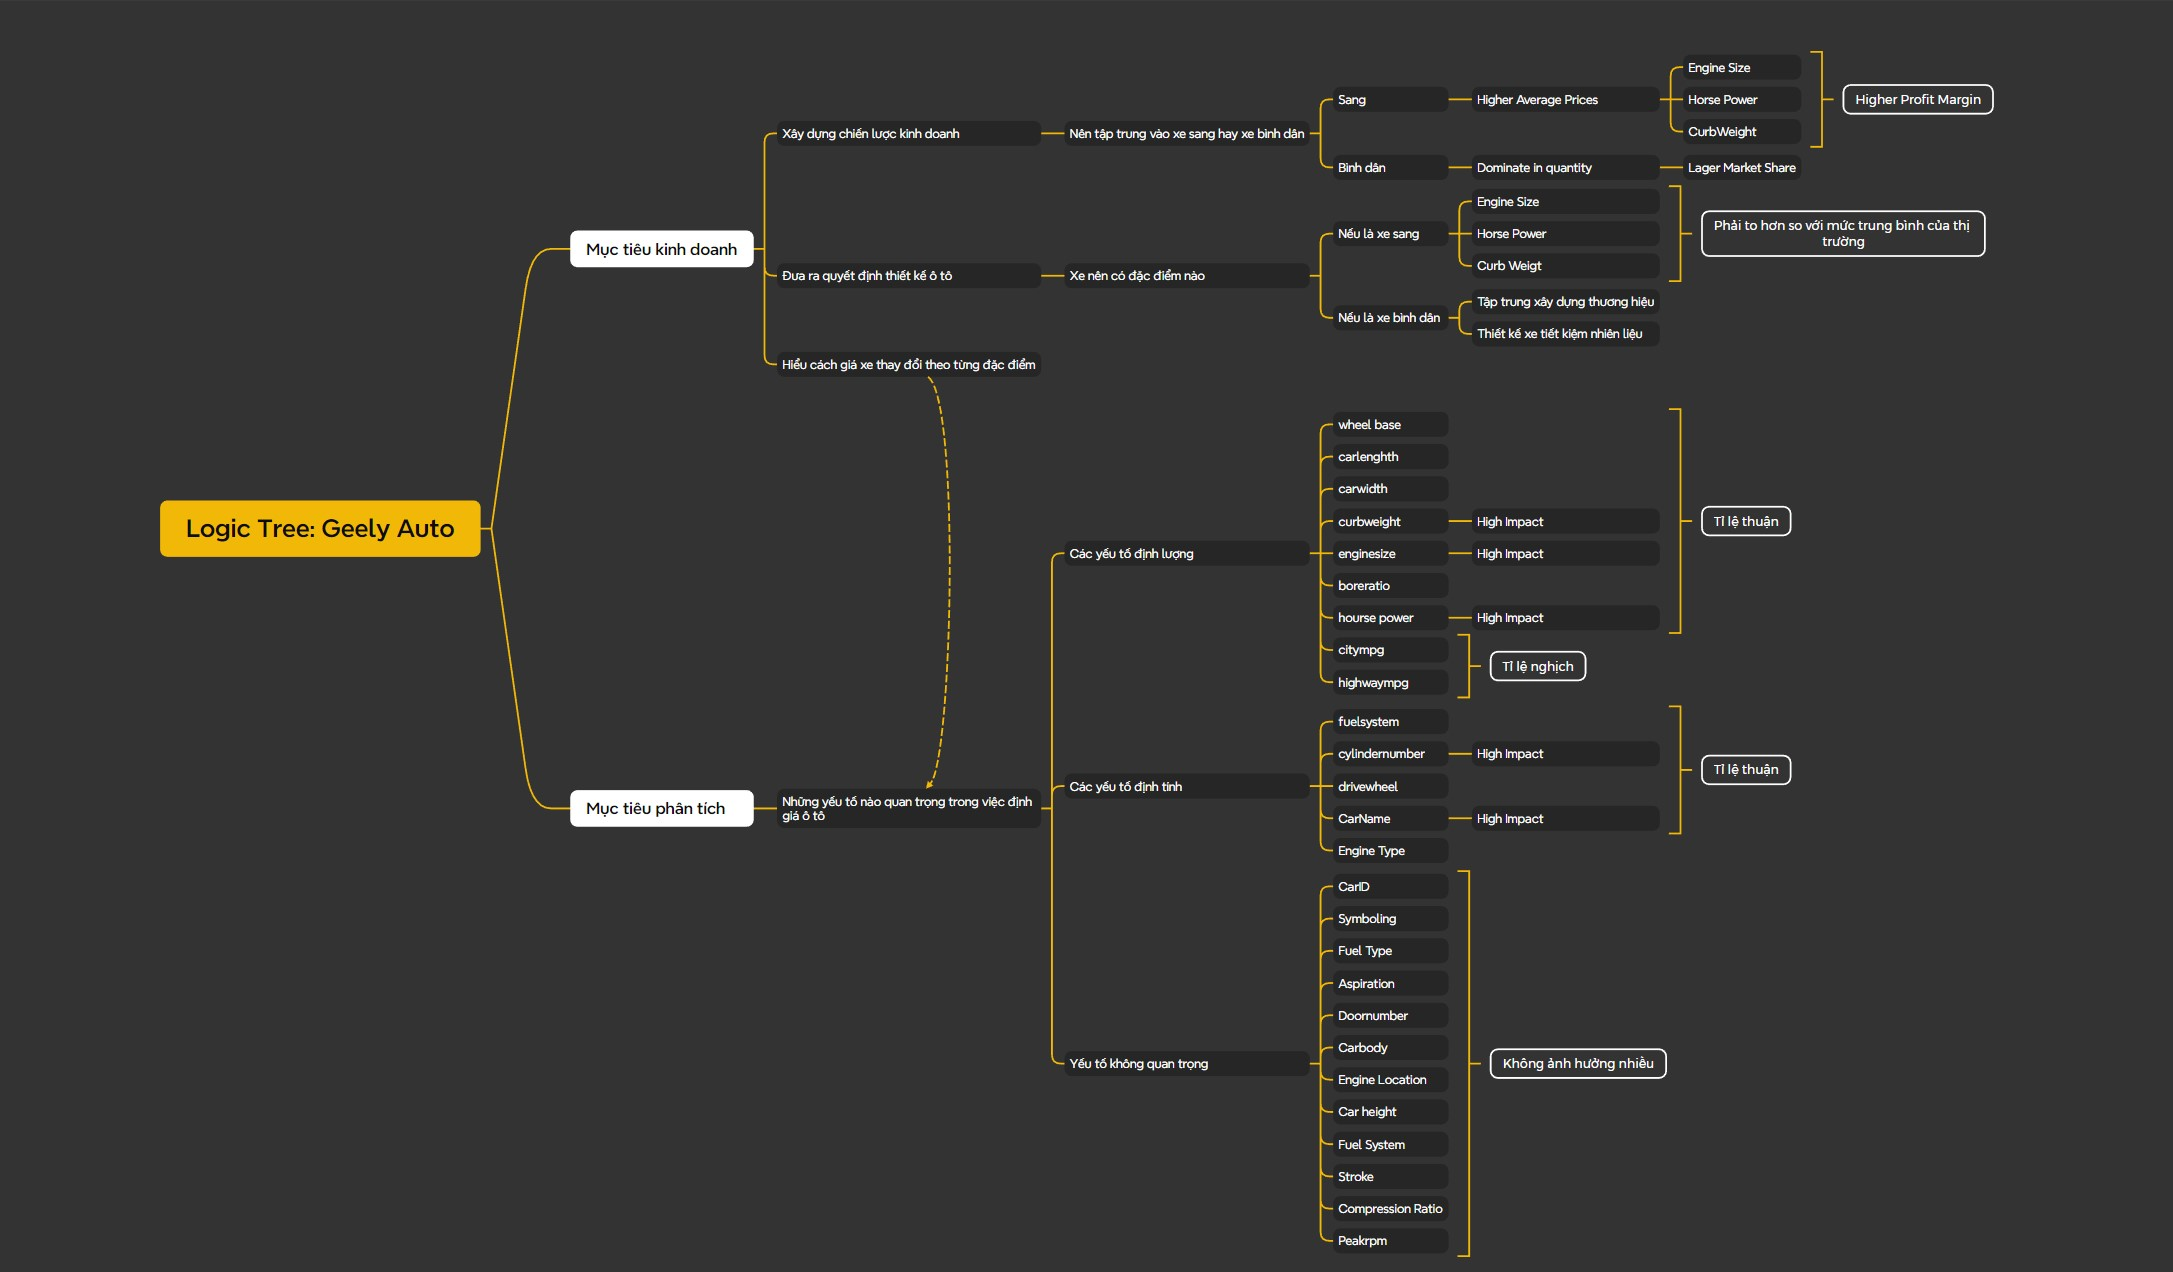

## Data Preprocessing

In [75]:
## Loại bỏ các features không ảnh hưởng quá nhiều đến giá thành

df.drop(['car_ID','symboling','fueltype','aspiration','doornumber','carbody','enginelocation','carheight','fuelsystem','stroke','compressionratio', 'peakrpm'],axis = 1, inplace=True)
df

,CarName,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,citympg,highwaympg,price
0,alfa-romero giulia,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,21,27,13495.0
1,alfa-romero stelvio,rwd,88.6,168.8,64.1,2548,dohc,four,130,3.47,111,21,27,16500.0
2,alfa-romero Quadrifoglio,rwd,94.5,171.2,65.5,2823,ohcv,six,152,2.68,154,19,26,16500.0
3,audi 100 ls,fwd,99.8,176.6,66.2,2337,ohc,four,109,3.19,102,24,30,13950.0
4,audi 100ls,4wd,99.4,176.6,66.4,2824,ohc,five,136,3.19,115,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,volvo 145e (sw),rwd,109.1,188.8,68.9,2952,ohc,four,141,3.78,114,23,28,16845.0
201,volvo 144ea,rwd,109.1,188.8,68.8,3049,ohc,four,141,3.78,160,19,25,19045.0
202,volvo 244dl,rwd,109.1,188.8,68.9,3012,ohcv,six,173,3.58,134,18,23,21485.0
203,volvo 246,rwd,109.1,188.8,68.9,3217,ohc,six,145,3.01,106,26,27,22470.0


Label Encoder: CarName, enginetype, cylindernumber

In [76]:
#Label Encoder: CarName, enginetype, cylindernumber
le = LabelEncoder()
df['CarName'] = le.fit_transform(df['CarName'])
df['enginetype'] = le.fit_transform(df['enginetype'])
df['cylindernumber'] = le.fit_transform(df['cylindernumber'])
df

,CarName,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,citympg,highwaympg,price
0,2,rwd,88.6,168.8,64.1,2548,0,2,130,3.47,111,21,27,13495.0
1,3,rwd,88.6,168.8,64.1,2548,0,2,130,3.47,111,21,27,16500.0
2,1,rwd,94.5,171.2,65.5,2823,5,3,152,2.68,154,19,26,16500.0
3,4,fwd,99.8,176.6,66.2,2337,3,2,109,3.19,102,24,30,13950.0
4,5,4wd,99.4,176.6,66.4,2824,3,1,136,3.19,115,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,139,rwd,109.1,188.8,68.9,2952,3,2,141,3.78,114,23,28,16845.0
201,138,rwd,109.1,188.8,68.8,3049,3,2,141,3.78,160,19,25,19045.0
202,140,rwd,109.1,188.8,68.9,3012,5,3,173,3.58,134,18,23,21485.0
203,142,rwd,109.1,188.8,68.9,3217,3,3,145,3.01,106,26,27,22470.0


onehot: Drivewheel

In [77]:
df = pd.get_dummies(df, columns=['drivewheel'])
df = df.astype(int)

In [78]:
df

,CarName,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,citympg,highwaympg,price,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd
0,2,88,168,64,2548,0,2,130,3,111,21,27,13495,0,0,1
1,3,88,168,64,2548,0,2,130,3,111,21,27,16500,0,0,1
2,1,94,171,65,2823,5,3,152,2,154,19,26,16500,0,0,1
3,4,99,176,66,2337,3,2,109,3,102,24,30,13950,0,1,0
4,5,99,176,66,2824,3,1,136,3,115,18,22,17450,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,139,109,188,68,2952,3,2,141,3,114,23,28,16845,0,0,1
201,138,109,188,68,3049,3,2,141,3,160,19,25,19045,0,0,1
202,140,109,188,68,3012,5,3,173,3,134,18,23,21485,0,0,1
203,142,109,188,68,3217,3,3,145,3,106,26,27,22470,0,0,1


chuẩn hóa dữ liệu

## Modeling

In [ ]:
# Setup random seed
np.random.seed(42)

# Split the data into features (X) and labels (y)
X = df.drop("price", axis=1)
y = df["price"]

### Randomforestregressor

In [125]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Institate and fit the model (on the training set)
RFR = RandomForestRegressor()
RFR.fit(X_train, y_train)
RFR.score(X_test, y_test)

0.9127228937473961

###Linear Regression

In [124]:
lin = LinearRegression()
lin.fit(X_train, y_train)
lin.score(X_test, y_test)

0.7312646659372577

###Lasso Regression

In [128]:
las = Lasso()
las.fit(X_train, y_train)
las.score(X_test, y_test)

0.7662914828314742

### ElasticNet

In [129]:
ela = ElasticNet()
ela.fit(X_train, y_train)
ela.score(X_test, y_test)

0.7767578329164866

###Ridge

In [130]:
Ridge = Ridge()
Ridge.fit(X_train, y_train)
Ridge.score(X_test, y_test)

0.7668821942656565

## Đánh giá Model

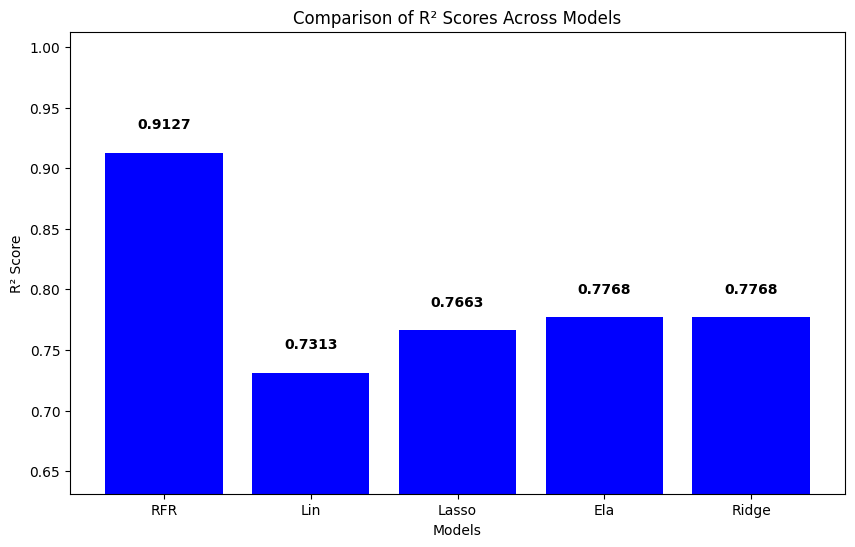

In [144]:
# Tên các mô hình
models = ["RFR", "Lin", "Lasso", "Ela", "Ridge"]

# R² scores từ kết quả của bạn
r2_scores = [0.9127, 0.7313, 0.7663, 0.7768, 0.7768]

# Tạo biểu đồ cột
plt.figure(figsize=(10, 6))
colors = ["Blue" if r2 > 0 else "RoyalBlue" for r2 in r2_scores]

plt.bar(models, r2_scores, color=colors)
plt.xlabel("Models")
plt.ylabel("R² Score")
plt.title("Comparison of R² Scores Across Models")
plt.ylim(min(r2_scores) - 0.1, max(r2_scores) + 0.1)  # Giới hạn trục y

# Hiển thị giá trị trên cột
for i, v in enumerate(r2_scores):
    plt.text(i, v + 0.02, f"{v:.4f}", ha='center', fontsize=10, fontweight='bold')

plt.axhline(y=0, color='black', linewidth=1, linestyle="--")  # Đường chuẩn R² = 0
plt.show()